## This project is to analyze the factors that contribute to car pricing.

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [52]:
df = pd.read_csv(r'C:\Users\Megha Nair\OneDrive\Desktop\projects to upload in github\BMW CAR ANALYSIS\bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


## Analysis of Data

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [55]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [56]:
df.duplicated().sum()

117

In [57]:
df = df.drop_duplicates()

In [58]:
df.duplicated().sum()

0

In [59]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [60]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000
mean,2017.062828,22692.888691,25710.978995,131.597431,56.483121,2.170161
std,2.350668,11434.921030,25146.634940,61.611394,31.465604,0.552556
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14897.000000,5665.750000,135.000000,45.600000,2.000000
50%,2017.000000,20261.500000,18783.000000,145.000000,53.300000,2.000000
75%,2019.000000,27890.000000,38436.500000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


## Exploratory Data Analysis EDA

<Axes: xlabel='price', ylabel='Count'>

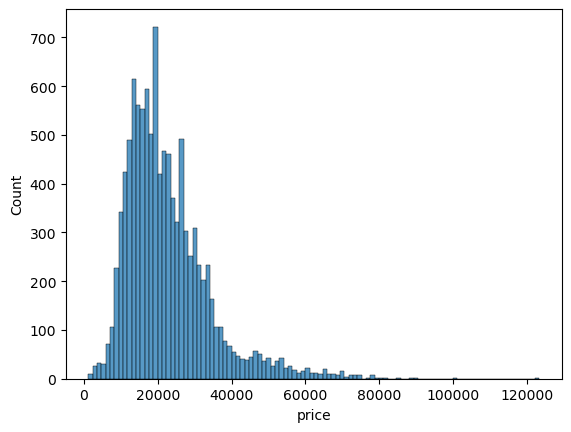

In [62]:
sns.histplot(x = 'price', data = df)

<Axes: xlabel='model', ylabel='count'>

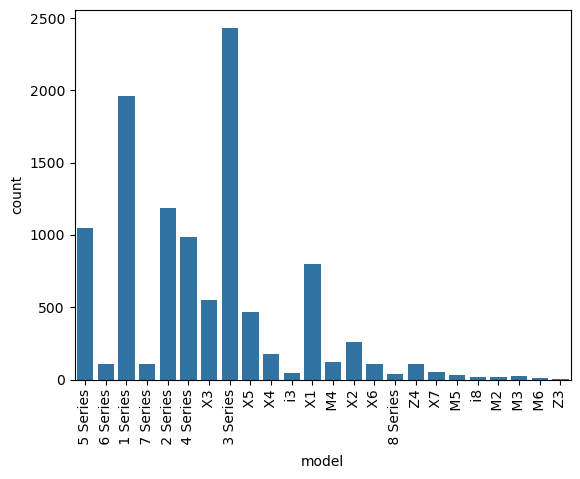

In [63]:
plt.xticks(rotation = 90)
sns.countplot(x = 'model', data = df)

<Axes: xlabel='year', ylabel='count'>

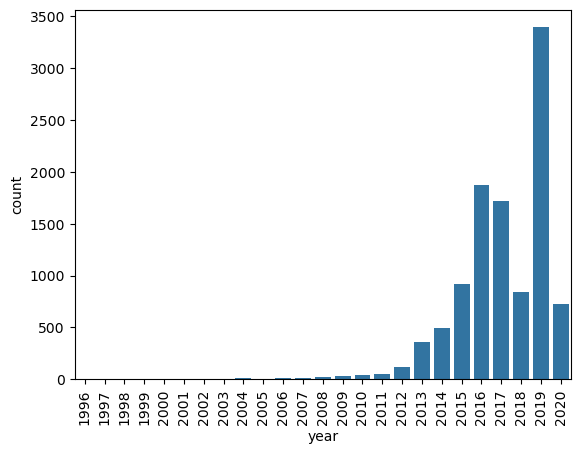

In [64]:
plt.xticks(rotation = 90)
sns.countplot(x = 'year', data = df)

<Axes: xlabel='transmission', ylabel='count'>

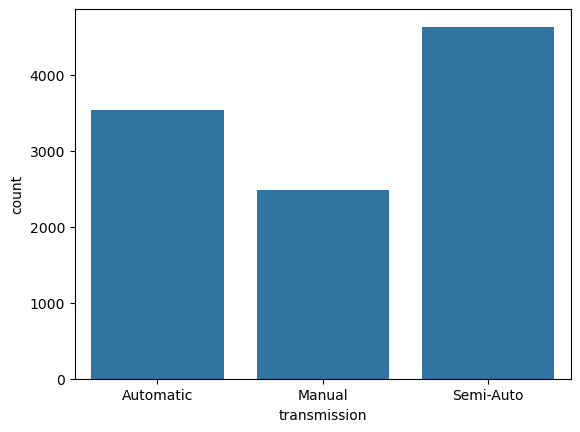

In [65]:
sns.countplot(x = 'transmission', data = df)

<Axes: xlabel='mileage', ylabel='Count'>

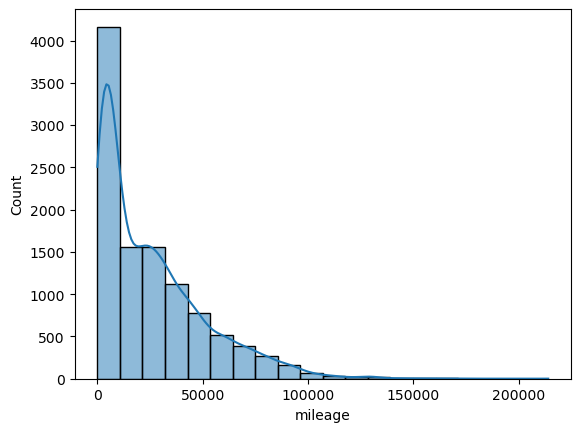

In [66]:
sns.histplot(df['mileage'],bins = 20,kde = True)

<Axes: xlabel='fuelType', ylabel='count'>

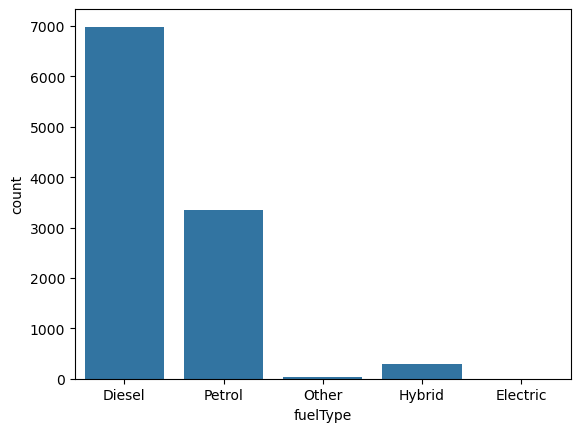

In [67]:
sns.countplot(x = 'fuelType', data = df)

<Axes: xlabel='tax', ylabel='Count'>

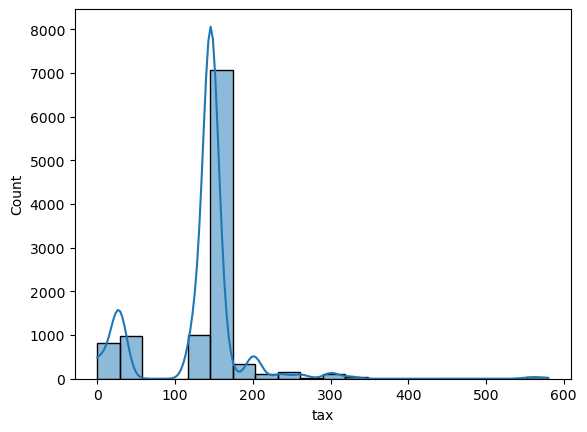

In [68]:
sns.histplot(df['tax'], bins=20, kde=True)

<Axes: xlabel='mpg', ylabel='Count'>

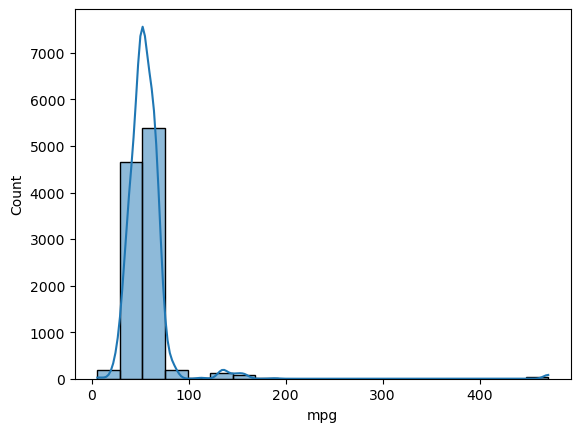

In [69]:
sns.histplot(df['mpg'], kde = True, bins =20)

<Axes: xlabel='engineSize', ylabel='count'>

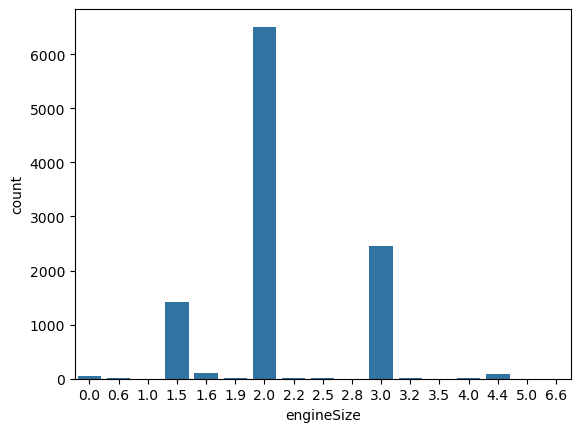

In [70]:
sns.countplot(x = 'engineSize', data = df)

<Axes: xlabel='model', ylabel='price'>

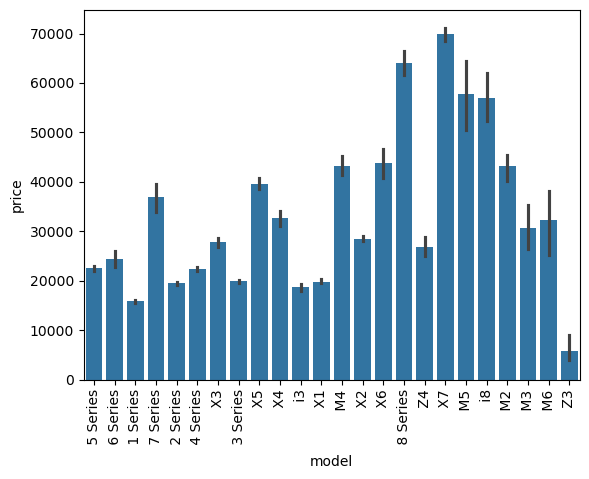

In [71]:
plt.xticks(rotation = 90)
sns.barplot(x = 'model',y='price', data = df)

<Axes: xlabel='year', ylabel='price'>

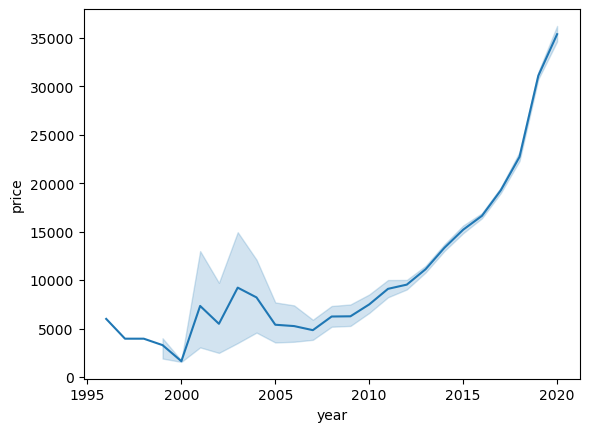

In [72]:
sns.lineplot(x ='year',y = 'price', data = df)

<Axes: xlabel='transmission', ylabel='price'>

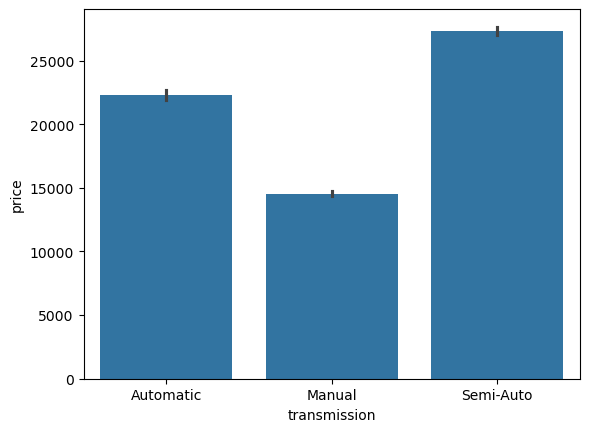

In [73]:
sns.barplot(x = 'transmission',y= 'price', data = df)

<Axes: xlabel='mileage', ylabel='price'>

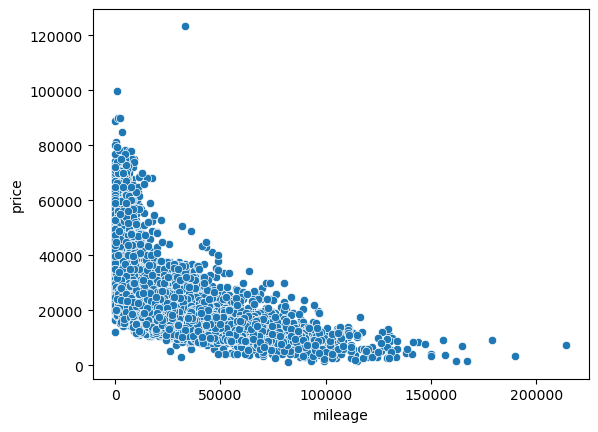

In [74]:
sns.scatterplot(x = 'mileage',y= 'price', data = df)

<Axes: xlabel='fuelType', ylabel='price'>

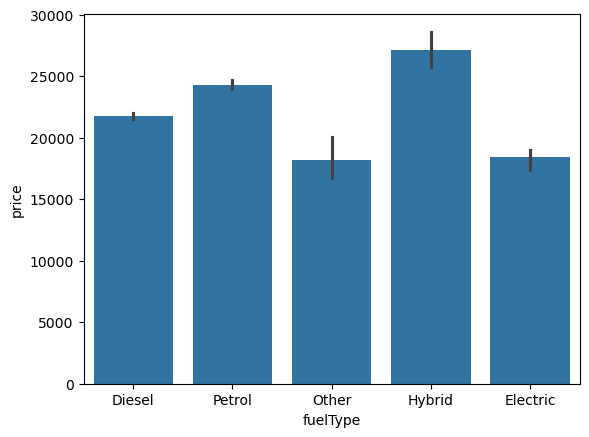

In [75]:
sns.barplot(x = 'fuelType',y= 'price', data = df)

<Axes: xlabel='engineSize', ylabel='price'>

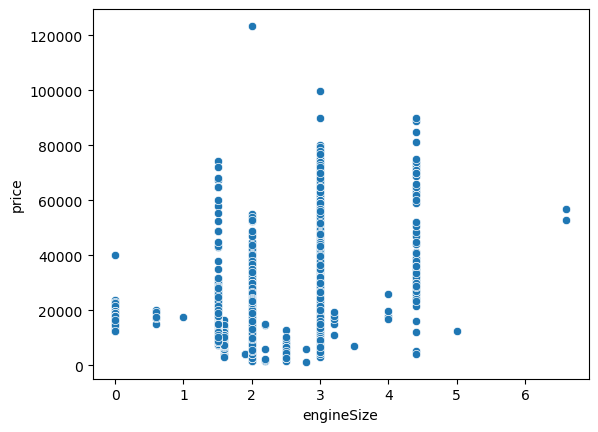

In [76]:
sns.scatterplot(x = 'engineSize',y= 'price', data = df)

<Axes: xlabel='mpg', ylabel='price'>

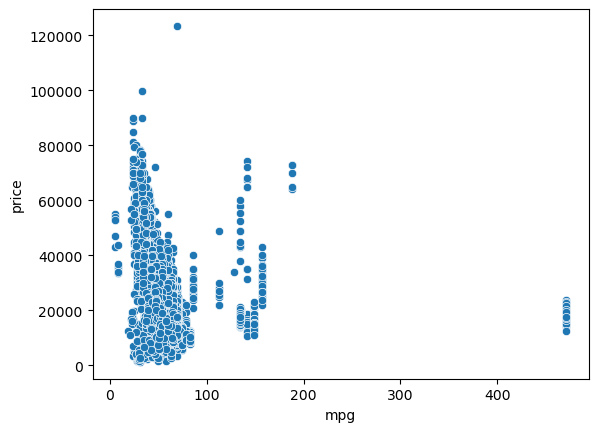

In [77]:
sns.scatterplot(x = 'mpg',y= 'price', data = df)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10664 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10664 non-null  object 
 1   year          10664 non-null  int64  
 2   price         10664 non-null  int64  
 3   transmission  10664 non-null  object 
 4   mileage       10664 non-null  int64  
 5   fuelType      10664 non-null  object 
 6   tax           10664 non-null  int64  
 7   mpg           10664 non-null  float64
 8   engineSize    10664 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 833.1+ KB


**Converting Categorical Data to Numberical Data**

In [80]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for column in df.columns:
    df[column] = LE.fit_transform(df[column])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10664 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   model         10664 non-null  int32
 1   year          10664 non-null  int64
 2   price         10664 non-null  int64
 3   transmission  10664 non-null  int32
 4   mileage       10664 non-null  int64
 5   fuelType      10664 non-null  int32
 6   tax           10664 non-null  int64
 7   mpg           10664 non-null  int64
 8   engineSize    10664 non-null  int64
dtypes: int32(3), int64(6)
memory usage: 708.2 KB


## Modeling

In [83]:
final_res =[]

In [84]:
x = df.drop('price', axis =1)
y = df.price

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8531, 8) (2133, 8) (8531,) (2133,)


**Linear Regression**

In [87]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [88]:
y_pred_LR = LR.predict(x_test)

In [89]:
from sklearn.metrics import r2_score,mean_absolute_error

In [90]:
print('Linear Regression:')
print('R2 Score :',r2_score(y_test,y_pred_LR))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred_LR))
r2_score_LR = r2_score(y_test,y_pred_LR)
final_res.append(r2_score_LR)

Linear Regression:
R2 Score : 0.8708148692192811
Mean Absolute Error : 277.4094042262535


**Decision Tree**

In [92]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [93]:
y_pred_DT = DT.predict(x_test)

In [94]:
print('Decision Tree :')
print('R2 Score :',r2_score(y_test,y_pred_DT))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred_DT))
r2_score_DT = r2_score(y_test,y_pred_DT)
final_res.append(r2_score_DT)

Decision Tree :
R2 Score : 0.9284782450548402
Mean Absolute Error : 187.28699796843256


**Random Forest**

In [96]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [97]:
y_pred_RF = RF.predict(x_test)

In [98]:
print('Random Forest Regressor :')
print('R2 Score :',r2_score(y_test,y_pred_RF))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred_RF))
r2_score_RF = r2_score(y_test,y_pred_RF)
final_res.append(r2_score_RF)

Random Forest Regressor :
R2 Score : 0.9605414071599301
Mean Absolute Error : 141.12984510972694


**XGBoost**

In [100]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [101]:
y_pred_xgb = xgb.predict(x_test)

In [102]:
print('XGBoost :')
print('R2 Score :', r2_score(y_test,y_pred_xgb))
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred_xgb))
r2_score_xgb = r2_score(y_test,y_pred_xgb)
final_res.append(r2_score_xgb)

XGBoost :
R2 Score : 0.9649206372503095
Mean Absolute Error : 133.7683820350596


**K-Nearest Neighbors**

In [104]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [105]:
y_pred_KNN = KNN.predict(x_test)

In [106]:
print('K-Nearest Neighbors :')
print('R2 Score :', r2_score(y_test,y_pred_KNN))
print(' Mean Absolute Error :', mean_absolute_error(y_test,y_pred_KNN))
r2_score_KNN = r2_score(y_test,y_pred_KNN)
final_res.append(r2_score_KNN)

K-Nearest Neighbors :
R2 Score : 0.7241466680322237
 Mean Absolute Error : 395.37318330989217


## Comparing Algorithm

In [108]:
final=np.array(final_res)
result=final.reshape(-1,1)
columns=['R2 Score']
index=['Linear Regression','Decision Tree', 'Random Forest','XGBoost','K-Nearest Neighbors']
final_result=pd.DataFrame(result,index=index,columns=columns)
final_result.sort_values(by='R2 Score', ascending=False)

,R2 Score
XGBoost,0.964921
Random Forest,0.960541
Decision Tree,0.928478
Linear Regression,0.870815
K-Nearest Neighbors,0.724147


## Hyperparameter optimization

#### Tuning Best Performing Models

In [111]:
from sklearn.model_selection import RandomizedSearchCV

**XGBoost**

In [113]:
xgb1 = XGBRegressor(random_state=42)
param_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb1,
    param_distributions=param_xgb,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(x_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='r2')

In [114]:
y_pred_xgb = xgb_search.predict(x_test) 

In [115]:
print('R2 Score: ',r2_score(y_test,y_pred_xgb))
print('Mean Absolute Score: ',mean_absolute_error(y_test,y_pred_xgb))
r2_score_model_xgb = r2_score(y_test,y_pred_xgb)
mae_model_xgb = mean_absolute_error(y_test,y_pred_xgb)

R2 Score:  0.9638808436114026
Mean Absolute Score:  136.69732472866397


**Rando Forest**

In [117]:
rf = RandomForestRegressor(random_state=42)

param_rf = {
    'n_estimators': [100, 200, 300, 500],     # Number of trees
    'max_depth': [None, 10, 20, 30, 40],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider per split
    'bootstrap': [True, False]                # Whether bootstrap samples are used
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_rf,
    n_iter=10,       # number of random combinations to try
    cv=3,            # 3-fold cross-validation
    scoring='r2',    # optimize for R²
    n_jobs=-1,       # use all cores
    random_state=42
)

# 4️⃣ Fit the model
rf_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2')

In [118]:
y_pred_rf = rf_search.predict(x_test) 

In [119]:
print('R2 Score: ',r2_score(y_test,y_pred_rf))
print('Mean Absolute Score: ',mean_absolute_error(y_test,y_pred_rf))
r2_score_model_rf = r2_score(y_test,y_pred_rf)
mae_model_rf = mean_absolute_error(y_test,y_pred_rf)

R2 Score:  0.9625080722706361
Mean Absolute Score:  139.4309209141664


In [120]:
models_score = pd.DataFrame({'R2 Score':[r2_score_model_xgb,r2_score_model_rf],'Mean Absolute Error':[mae_model_xgb,mae_model_rf]}, index=['XGBoost','Random Forest'])
models_score

,R2 Score,Mean Absolute Error
XGBoost,0.963881,136.697325
Random Forest,0.962508,139.430921


## Conclusion

After the parameter tuning process with XGBoosting and Random Forest I decided to select the XGBoost Model as it gives the least value of Mean Absolute Error as lower value of Mean Absolute Error is better and Higher R2 Score is better.